<a href="https://colab.research.google.com/github/LinaHu1990/Assignments/blob/main/CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Final Assignment - CO2 Emissions


In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## Question 1: What is the biggest predictor of a large CO2 output per capita of a country?

In [3]:
# Import data
# Clean data by drop rows with NAN values

def CO2_clean():
  url = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
  df = pd.DataFrame(url)
  df_clean = df.dropna()
  return df_clean

df_CO2 = CO2_clean()

#print(df_CO2)


In [4]:
# Dataframe shows two variables that measure CO2 output per capita respectively co2_per_capita and consumption_co2_per_capita
# Calculate correlation between co2_per_capita and other variables
# Calculate correlation between consumption_co2_per_capita and other variables

corr_co2 = df_CO2.corr()['co2_per_capita'].abs().sort_values(ascending=False)
corr_cons = df_CO2.corr()['consumption_co2_per_capita'].abs().sort_values(ascending=False)

# Both result show a high correlation with energy_per_capita
print(corr_co2)

co2_per_capita                       1.000000
ghg_excluding_lucf_per_capita        0.917498
co2_including_luc_per_capita         0.893064
ghg_per_capita                       0.861279
consumption_co2_per_capita           0.827985
                                       ...   
other_industry_co2                   0.019274
co2_including_luc_per_unit_energy    0.014154
co2_including_luc_growth_prct        0.012435
cumulative_other_co2                 0.011077
share_global_cumulative_other_co2    0.002608
Name: co2_per_capita, Length: 77, dtype: float64


<ipython-input-4-9b86761ec827>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_co2 = df_CO2.corr()['co2_per_capita'].abs().sort_values(ascending=False)
<ipython-input-4-9b86761ec827>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_cons = df_CO2.corr()['consumption_co2_per_capita'].abs().sort_values(ascending=False)


In [ ]:
# Test statistical significance

r_co2 = pearsonr(df_CO2['co2_per_capita'], df_CO2['energy_per_capita'])

print (r_co2)

PearsonRResult(statistic=0.7572942206048902, pvalue=3.2402119916331483e-230)


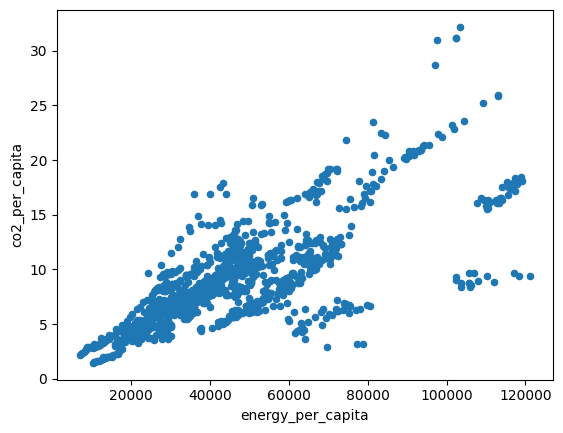

In [ ]:
graph = df_CO2.plot(x= 'energy_per_capita', y = 'co2_per_capita', kind = 'scatter')
plt.show()

## Answer to Question 1
The biggest predictor of a large CO2 output per capita of a country is the energy consumption per capita. There is a positive relation between both variables, meaning a higher energy consumption per capita will most likely increase the co2 output per capita. The pvalue < 0.05 and is considered to be statistically significant

## Discussion Question 1


Correlation Result for co2_per_capita show a high correlation between variables that provide an alternate definition to measure co2 per capita. These values are not taken into account in order to provide an answer. The highest variable that has a high correlation with co2_per_capita is energy_per_capita.  


## Question 2 Which countries are making the biggest strides in decreasing CO2 output?

In [ ]:
# Group data by country
# Calculate the difference between the first and last co2_per_capita per country

grouped = df_CO2.groupby('countries')
diff = grouped['co2_per_capita'].last() - grouped['co2_per_capita'].first()

print(diff.sort_values(ascending=False).head(3))


countries
Luxembourg       10.771
United States    10.085
Canada            9.507
Name: co2_per_capita, dtype: float64


## Answer to Question 2: Top 3 countries that show the biggest decrease are

1.   Luxembourg
2.   United States
3.   Canada











# Question 3 Which non-fossil fuel energy technology will have the best price in the future?

In [ ]:
# Import data
# Clean data by drop rows with NAN values

def energy_clean():
  url = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv')
  df = pd.DataFrame(url)
  df_clean = df.dropna()
  return df_clean

df_energy = energy_clean()


df_energy

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20702,United States,2014,USA,322033952.0,1.648266e+13,1.432,5.089,1119.494,360.515,198.706,...,0.706,0.304,8.231,35.039,497.093,564.071,181.65,1543.604,4.435,1.912
20703,United States,2015,USA,324607776.0,1.690258e+13,4.631,16.696,1162.053,377.211,196.021,...,0.956,0.412,4.989,21.695,518.788,587.540,190.72,1598.198,4.670,2.015
20704,United States,2016,USA,327210208.0,1.716256e+13,8.488,32.017,1250.661,409.229,191.803,...,1.342,0.577,19.020,95.018,613.806,693.713,226.99,1875.876,5.553,2.386
20705,United States,2017,USA,329791232.0,1.759628e+13,0.202,0.825,1243.373,410.054,190.211,...,1.907,0.805,12.031,69.804,683.609,771.094,254.30,2072.855,6.275,2.648
